# CIFAR Classifier Module Demo
*Welcome to the demo of our lib CIFAR Classifier !*

A quick summary of what will be showed in this notebook :



1. Load resources
2. Train a BoVW model
3. Split the dataset into training and validation sets
4. Compute the BoVW descriptor for each image
5. Prepare training structures
6. Train a classifier and evaluate its performance
7. Display some results
8. Test on meme images
9. Compute the results on the test set and export them

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CIFAR_Classif.data_preprocess import load_data, unpickle
from CIFAR_Classif.generic_classifier import GenericClassifier
from CIFAR_Classif.generic_features_extractor import GenericFeaturesExtractor
from CIFAR_Classif.metrics import benchmark_models, benchmark_feature_extractors
from CIFAR_Classif.bovw import get_SIFT_kp_and_desc, get_bovw_features
from sklearn.model_selection import train_test_split
import cv2
from sklearn.cluster import KMeans


### Data loading and train/test separation

In [2]:
path_list = ['../data/cifar-10-batches-py/data_batch_5', '../data/cifar-10-batches-py/data_batch_4', '../data/cifar-10-batches-py/data_batch_3',
             '../data/cifar-10-batches-py/data_batch_2', '../data/cifar-10-batches-py/data_batch_1']

meta_path = '../data/cifar-10-batches-py/batches.meta'

labels_meaning = unpickle(meta_path)[b'label_names'] # List of the labels

# Load the data
X, y = load_data(path_list, apply_preprocess=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) # 15% of the data for testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42) # 30% of 85% of the data for validation


## Bag of Visual Word 

### SIFT Features and BOVW computing

After some hand testing values we decided to take n_clusters=100 thus making 100 different visual words

In [3]:
#train_keypoints, train_descriptors = get_SIFT_kp_and_desc(X_train)
#train_bovw_features = get_bovw_features(kps=train_keypoints, descs=train_descriptors, n_clusters=100)

In [4]:
#test_keypoints, test_descriptors = get_SIFT_kp_and_desc(X_test)
#test_bovw_features = get_bovw_features(kps=test_keypoints, descs=test_descriptors, n_clusters=100)

n_cluster:  6
n_cluster:  7
n_cluster:  8
n_cluster:  9
n_cluster:  10
n_cluster:  11
n_cluster:  12
n_cluster:  13
n_cluster:  14
n_cluster:  15
n_cluster:  16
n_cluster:  17
n_cluster:  18
n_cluster:  19


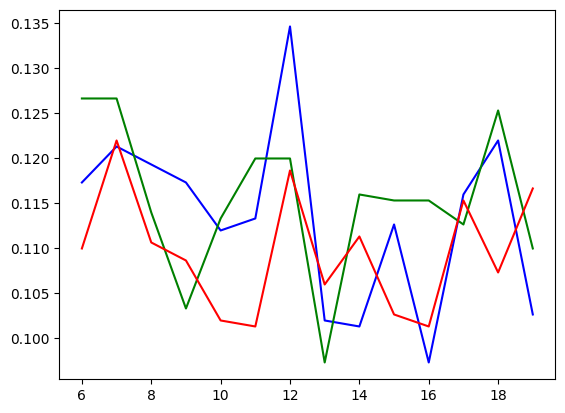

In [6]:
svc_accuracy = []
logistic_regression_accuracy = []
knn_accuracy = []

k_range = range(6, 20)

for k in k_range:
    print('n_cluster: ', k)
    sift_features = get_SIFT_kp_and_desc(X_train)
    train_bovw_features = get_bovw_features(kps=sift_features[0], descs=sift_features[1], n_clusters=k)
    
    sift_features = get_SIFT_kp_and_desc(X_test)
    test_bovw_features = get_bovw_features(kps=sift_features[0], descs=sift_features[1], n_clusters=k)
    
    accuracy_list, report_list = benchmark_models(train_bovw_features, y_train, test_bovw_features, y_test, model_list=["svc", "logistic_regression", "knn"], verbose=False)
    svc_accuracy.append(accuracy_list[0])
    logistic_regression_accuracy.append(accuracy_list[1])
    knn_accuracy.append(accuracy_list[2])

plt.plot(k_range, svc_accuracy, color='blue', label='SVC')
plt.plot(k_range, logistic_regression_accuracy, color='green', label='Logistic Regression')
plt.plot(k_range, knn_accuracy, color='red', label='KNN')

plt.show()

Here we illustrate our SIFT features and our Bag of Visual Words with an histogram

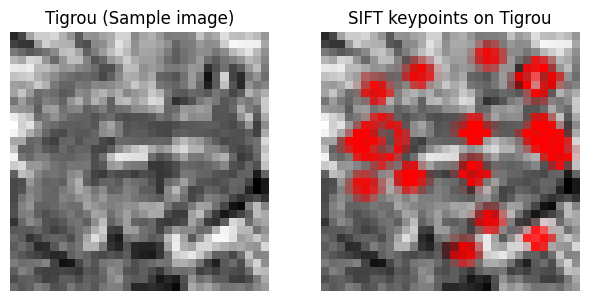

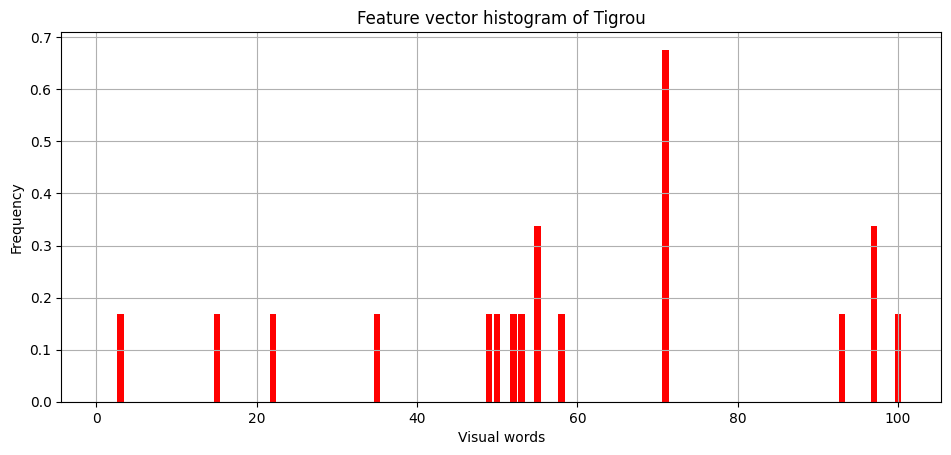

In [ ]:
img = X_train[0]
plt.subplot(1, 3, 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title('Tigrou (Sample image)')
plt.axis('off')

sift_kp_img = cv2.drawKeypoints(img, train_keypoints[0], 0, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(1, 3, 2)
plt.imshow(sift_kp_img, cmap='gray')
plt.title('SIFT keypoints on Tigrou')
plt.axis('off')

plt.subplots_adjust(right=1.5)
plt.show()

sample_feature_vector = train_bovw_features[0]
plt.bar(np.arange(1, len(sample_feature_vector)+1), sample_feature_vector, color='red')
plt.xlabel('Visual words')
plt.ylabel('Frequency')
plt.title('Feature vector histogram of Tigrou')
plt.grid()


plt.subplots_adjust(right=1.5)
plt.show()

## Features extraction

We chose to use the following feature extractors:
- Histogram of Gradient (HoG)
- Local Binary Pattern (LBP)

In [ ]:
features_train, features_test = benchmark_feature_extractors(X_train, X_test, feature_extractor_list=["hog", "lbp"])

hog_features_train = features_train["hog"]
hog_features_test = features_test["hog"]
lbp_features_train = features_train["lbp"]
lbp_features_test = features_test["lbp"]

## Models selection

We are comparing results from three different classifiers:

- SVC that is non-parametric and non linear.
- Logistic Regression that is parametric and linear.
- KNN that is non parametric and non linear.

In [ ]:
benchmark_models(train_bovw_features, y_train, test_bovw_features, y_test, model_list=["svc", "logistic_regression", "knn"])

------svc------
Accuracy: 0.13066666666666665
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.08      0.11       148
           1       0.10      0.05      0.07       170
           2       0.13      0.20      0.16       138
           3       0.11      0.10      0.10       144
           4       0.09      0.14      0.11       151
           5       0.11      0.09      0.10       140
           6       0.11      0.16      0.13       134
           7       0.17      0.23      0.19       146
           8       0.22      0.14      0.17       173
           9       0.15      0.12      0.13       156

    accuracy                           0.13      1500
   macro avg       0.13      0.13      0.13      1500
weighted avg       0.14      0.13      0.13      1500

------logistic_regression------
Accuracy: 0.12533333333333332
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.1

In [ ]:
benchmark_models(hog_features_train, y_train, hog_features_test, y_test, model_list=["random_forest", "decision_tree", "gradient_boosting"])

------random_forest------
Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.51      0.46       148
           1       0.39      0.34      0.36       170
           2       0.29      0.22      0.25       138
           3       0.22      0.20      0.21       144
           4       0.22      0.25      0.24       151
           5       0.30      0.24      0.27       140
           6       0.34      0.46      0.39       134
           7       0.27      0.29      0.28       146
           8       0.41      0.43      0.42       173
           9       0.36      0.35      0.36       156

    accuracy                           0.33      1500
   macro avg       0.32      0.33      0.32      1500
weighted avg       0.33      0.33      0.33      1500

------decision_tree------
Accuracy: 0.19933333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.28      0.28

KeyboardInterrupt: 

Pour le classifier KNN on effectue un GridSearch afin de connaître les hyperparamètres optimaux

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = GenericClassifier(kernel='KNN')
grid_search = knn.grid_search(param_grid, X_train, y_train, verbose=True)

ValueError: Invalid kernel. Choose from: ['svc', 'logistic_regression', 'random_forest', 'knn', 'decision_tree', 'gradient_boosting']